Create the maze dataset


Training:   0%|          | 0/100 [00:00<?, ?Epochs/s]

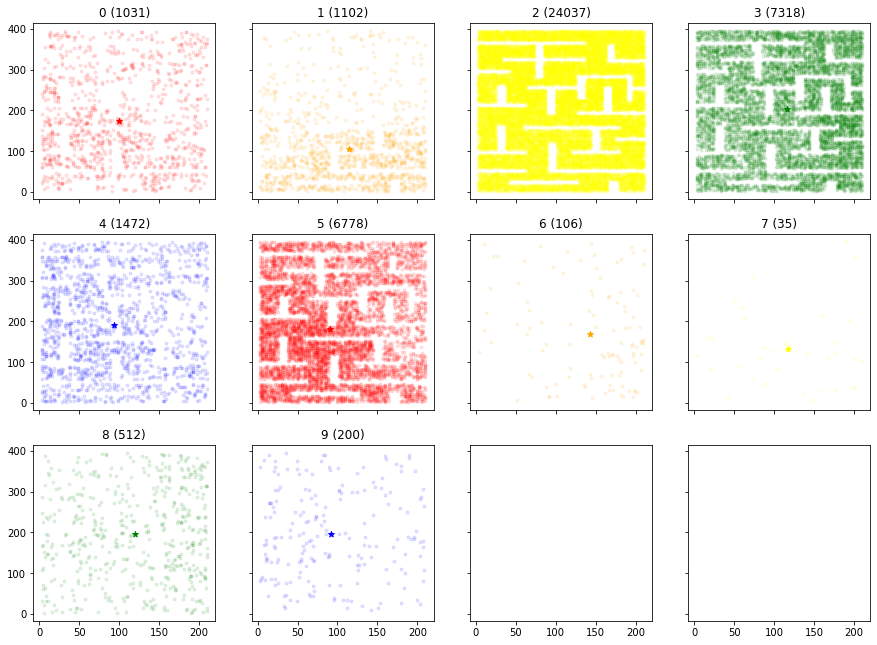

test, ep 0


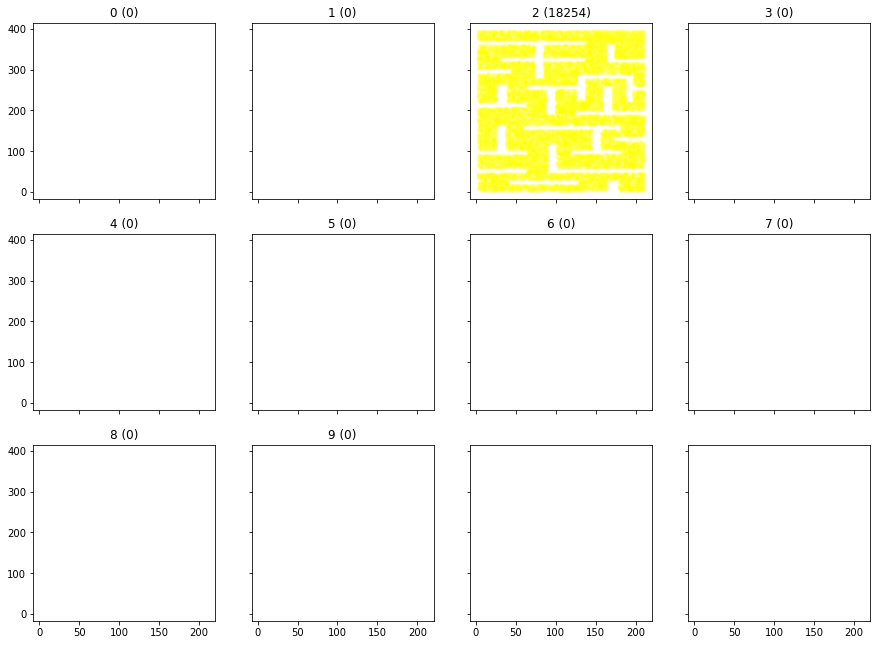

Training:  10%|█         | 10/100 [00:10<00:44,  2.03Epochs/s]

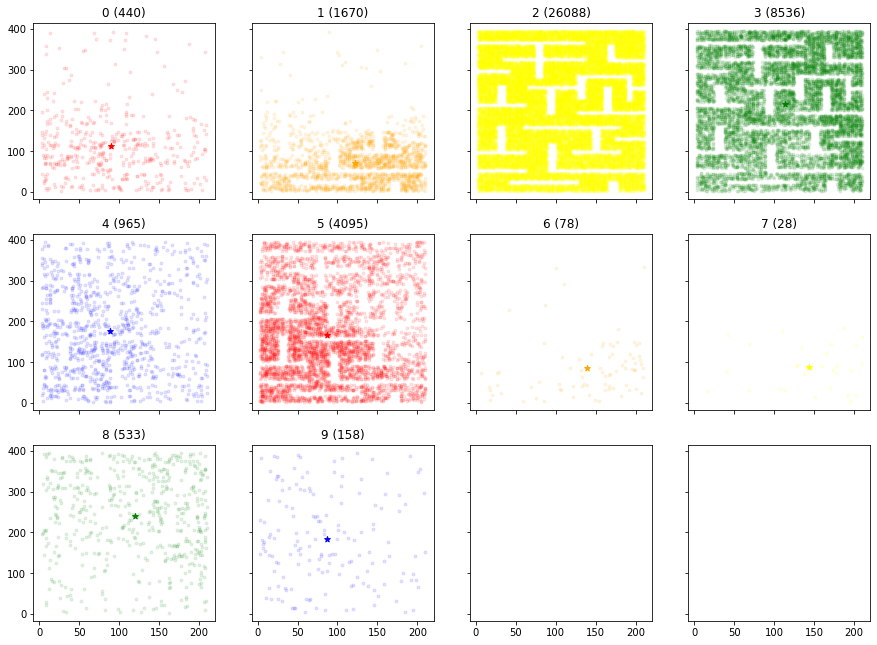

test, ep 10


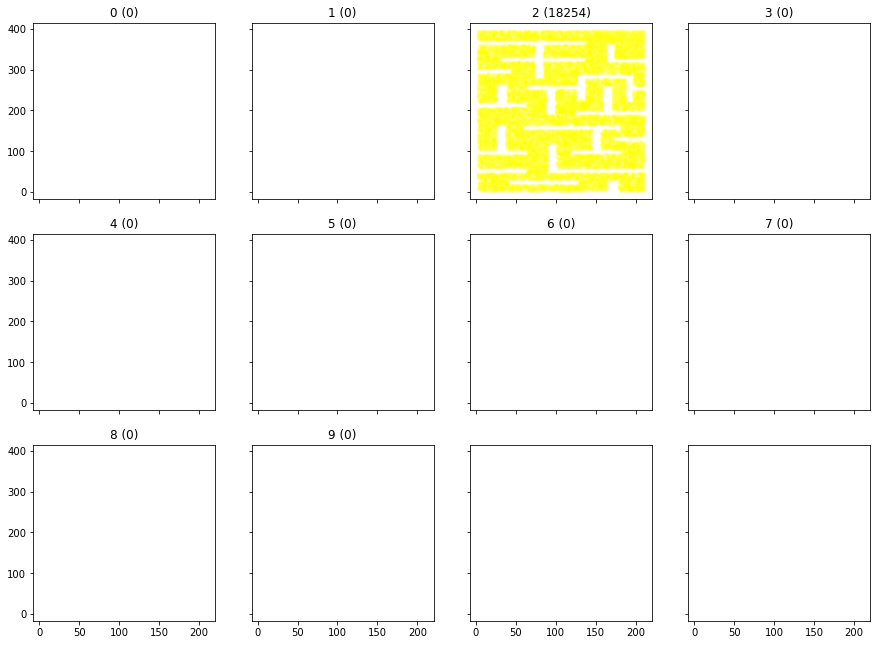

Training:  20%|██        | 20/100 [00:19<00:37,  2.12Epochs/s]

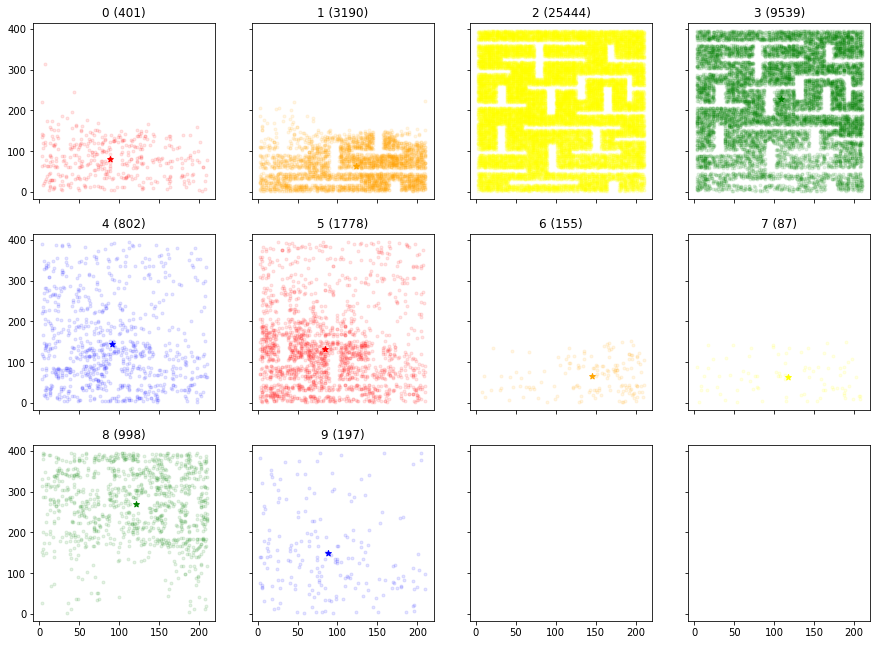

test, ep 20


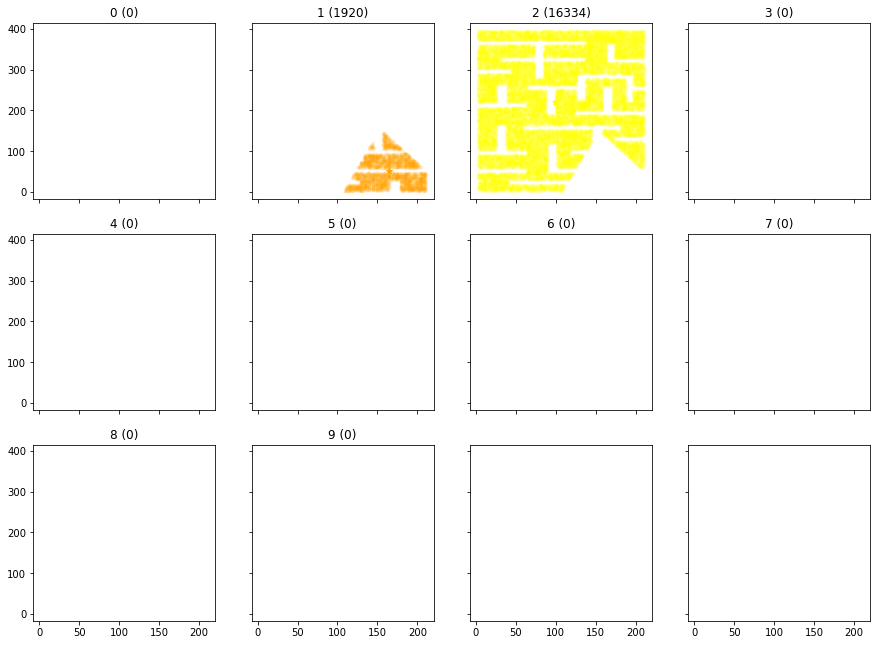

Training:  30%|███       | 30/100 [00:29<00:30,  2.26Epochs/s]

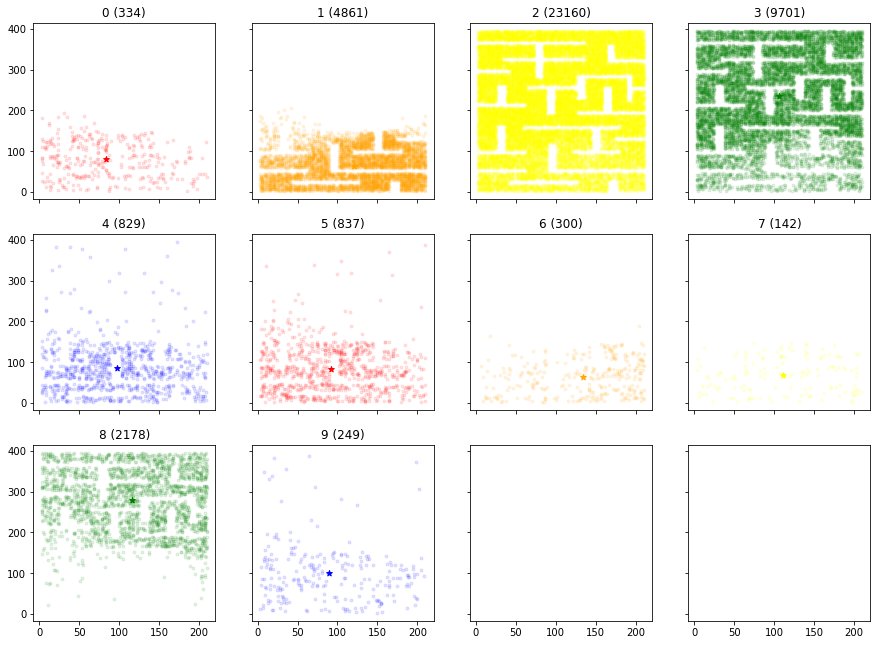

test, ep 30


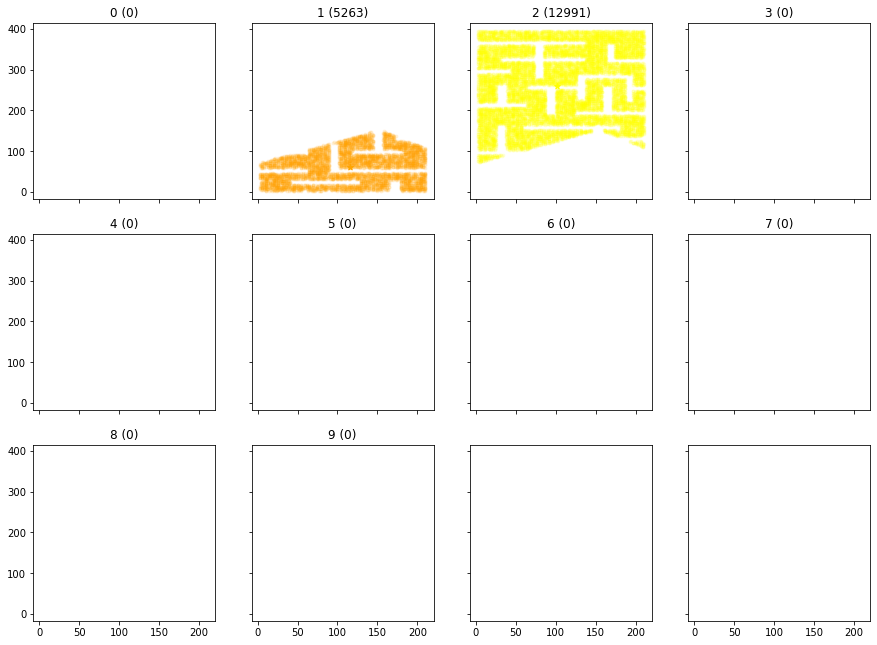

Training:  40%|████      | 40/100 [00:38<00:26,  2.30Epochs/s]

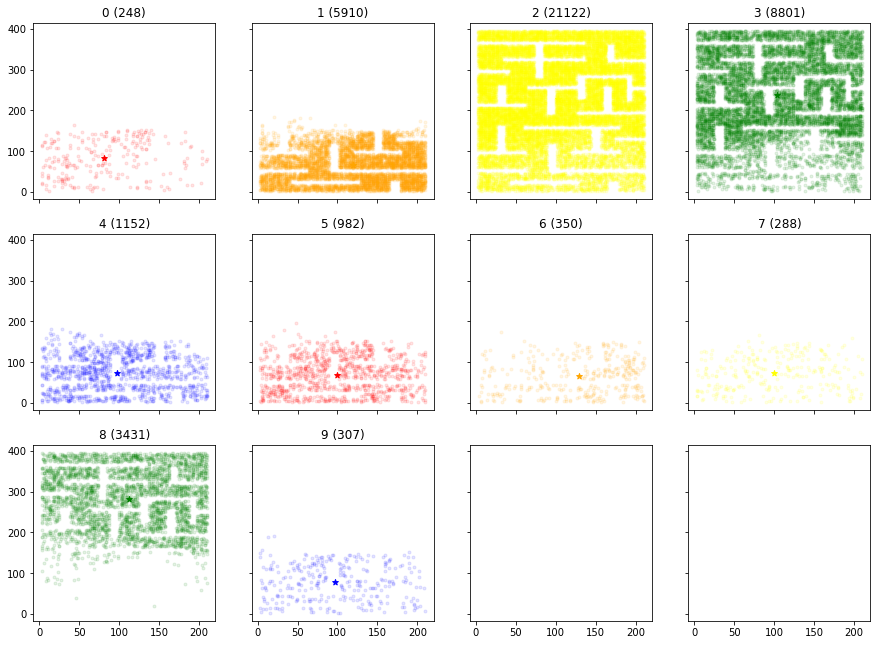

test, ep 40


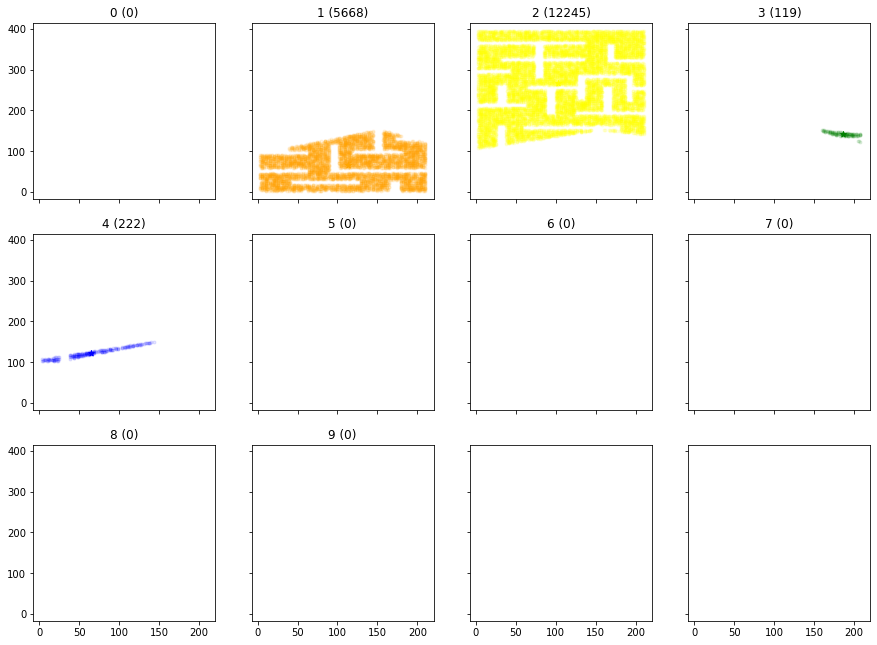

Training:  50%|█████     | 50/100 [00:47<00:22,  2.27Epochs/s]

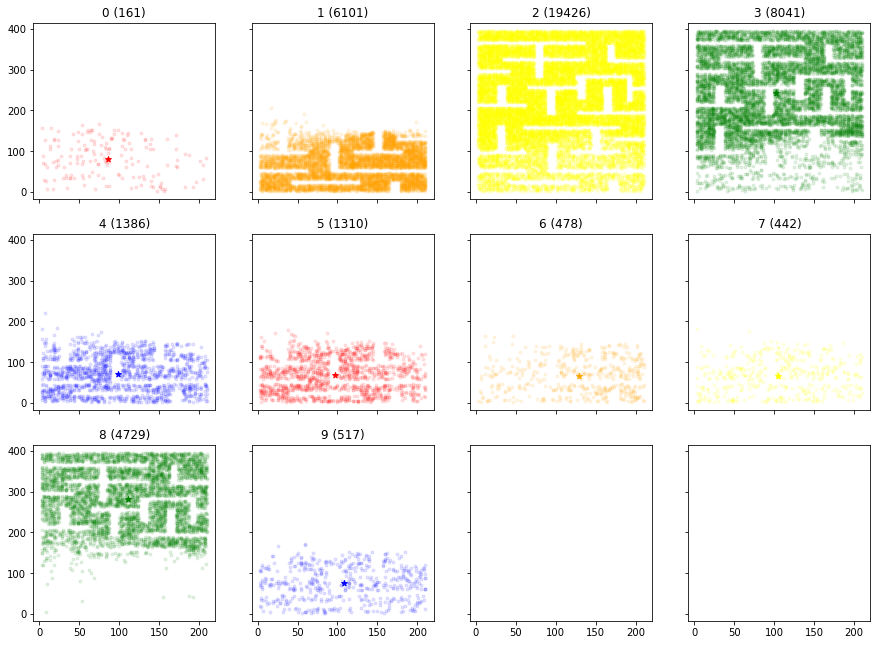

test, ep 50


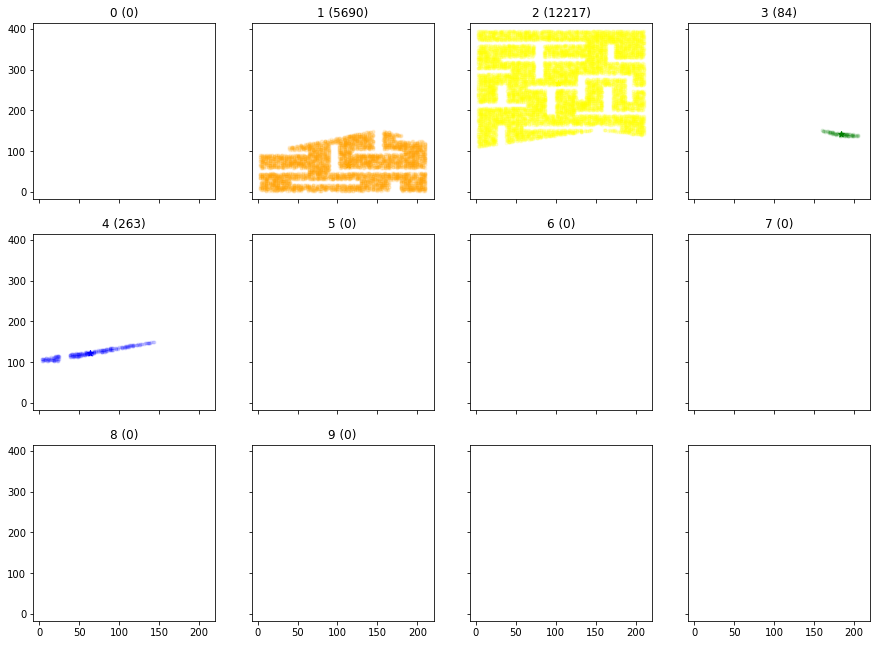

Training:  60%|██████    | 60/100 [00:57<00:18,  2.19Epochs/s]

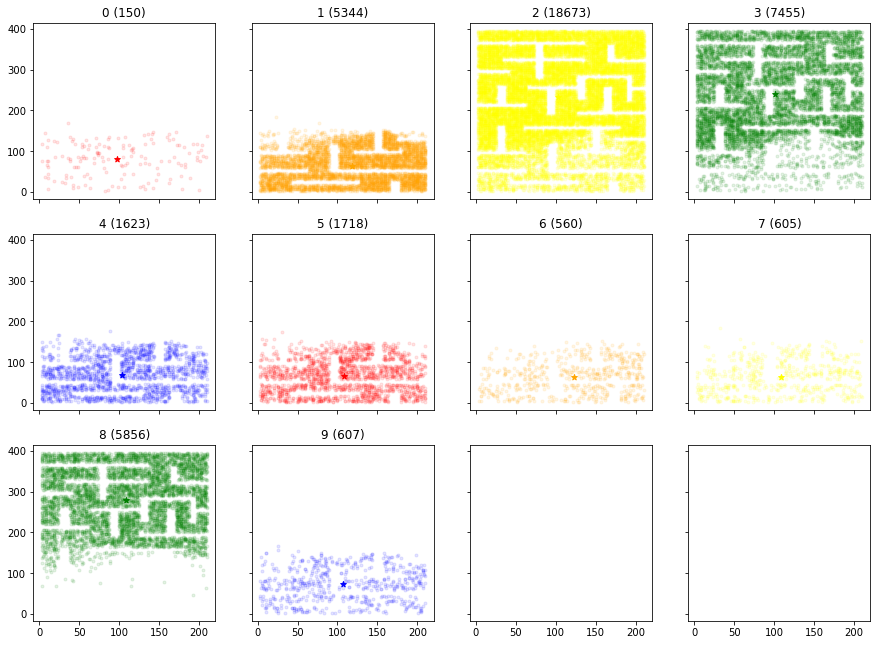

test, ep 60


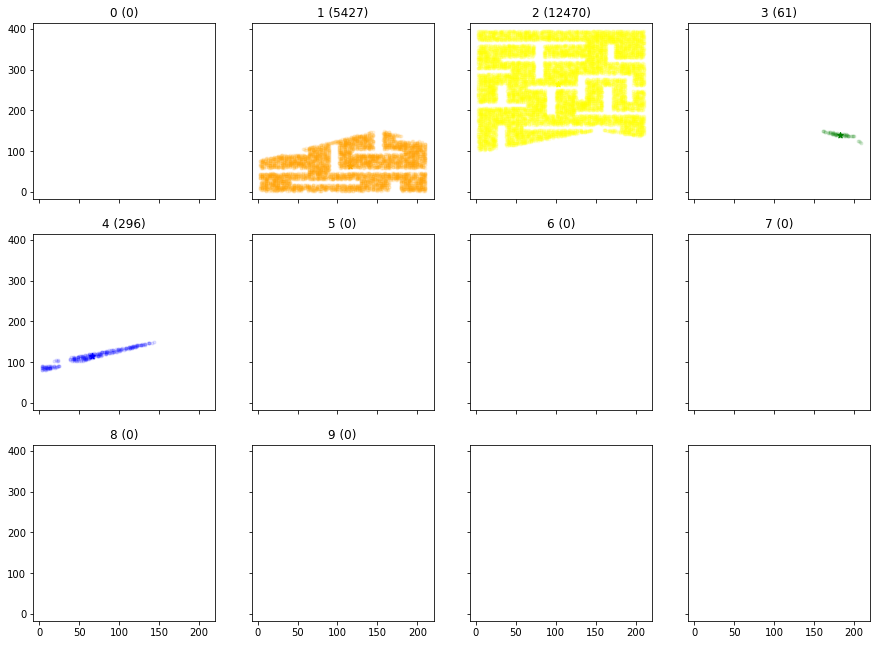

Training:  70%|███████   | 70/100 [01:06<00:12,  2.41Epochs/s]

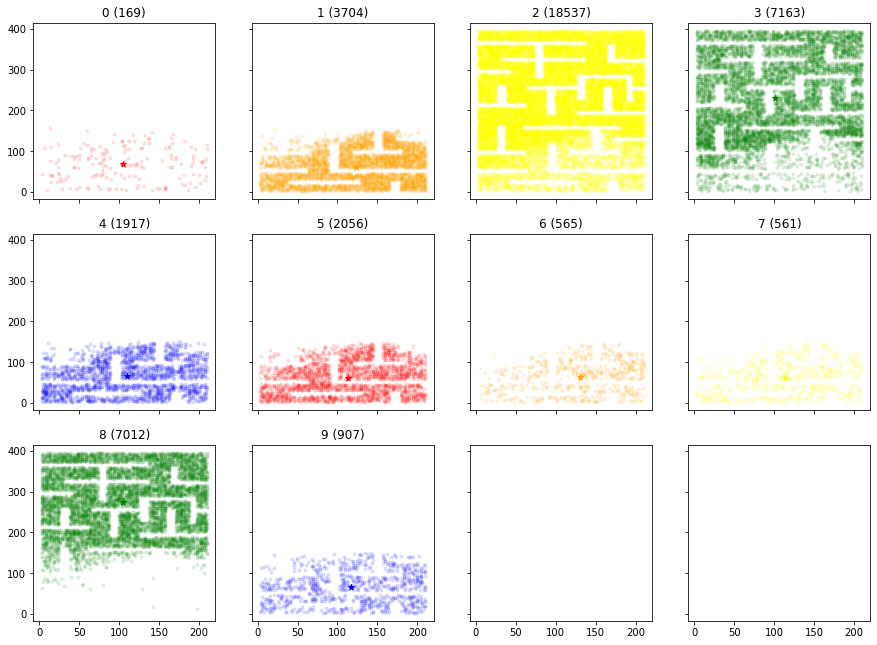

test, ep 70


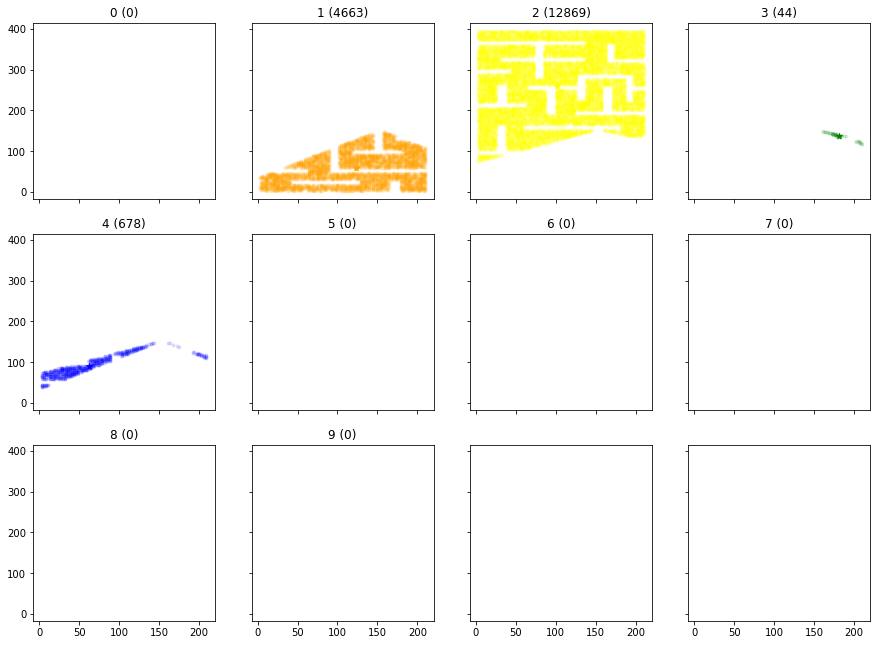

Training:  80%|████████  | 80/100 [01:16<00:09,  2.21Epochs/s]

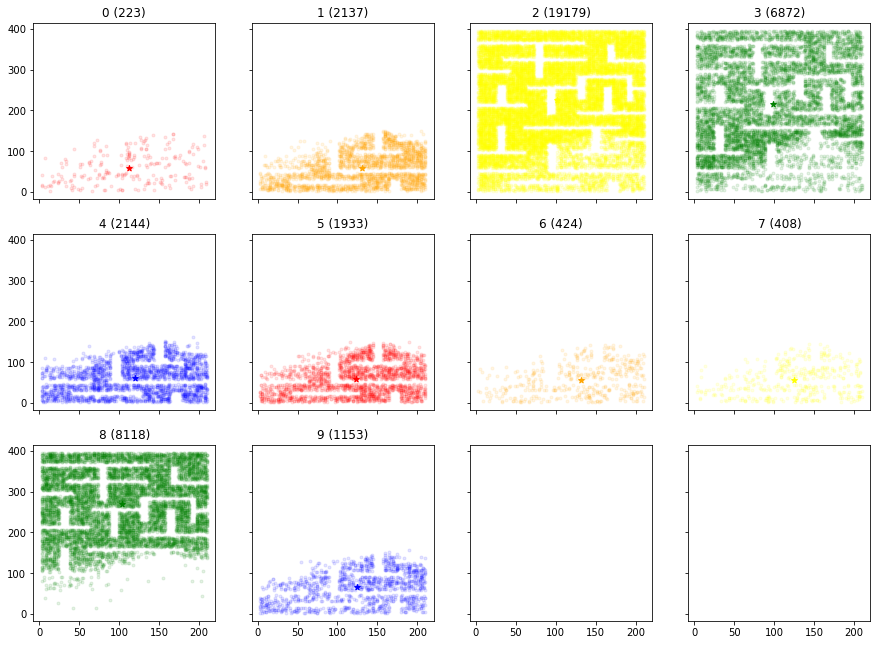

test, ep 80


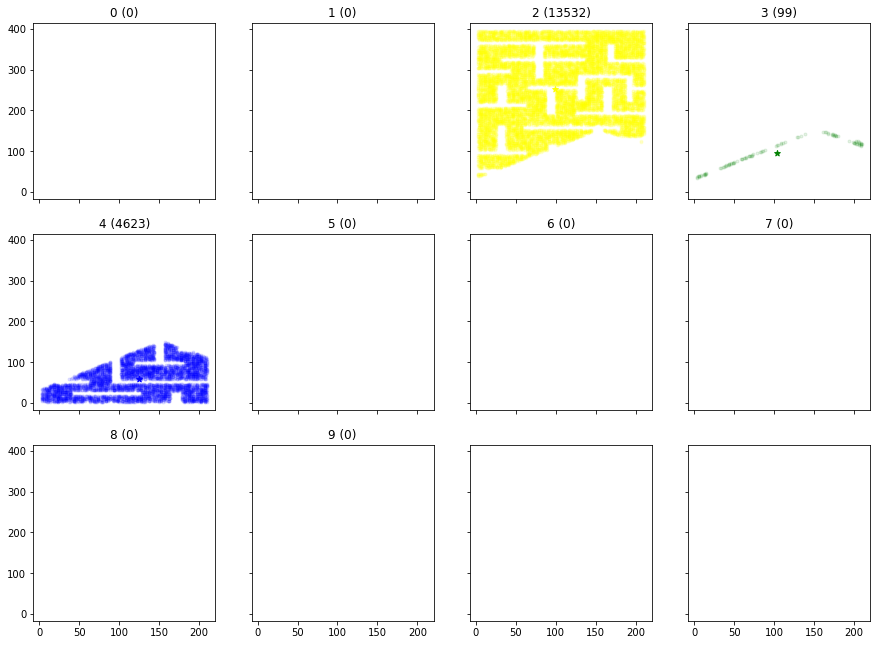

Training:  90%|█████████ | 90/100 [01:25<00:04,  2.28Epochs/s]

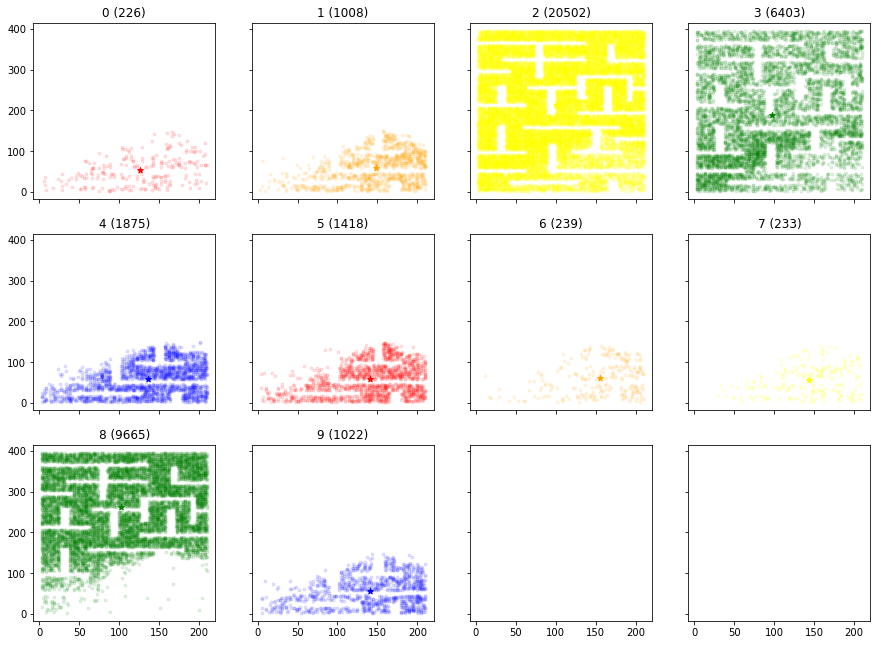

test, ep 90


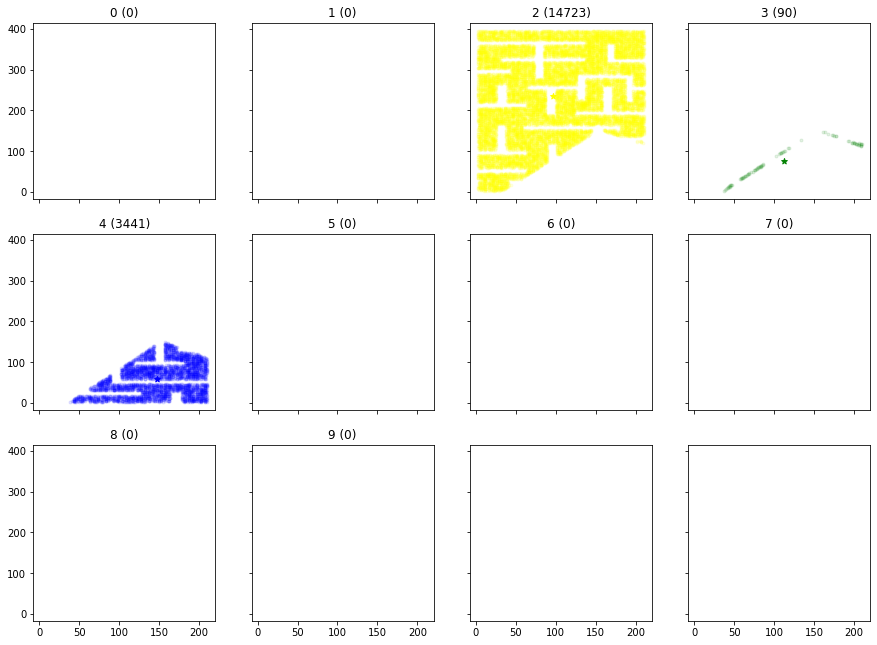

Training: 100%|██████████| 100/100 [01:34<00:00,  1.05Epochs/s]


Minimum loss: 0.4898812472820282



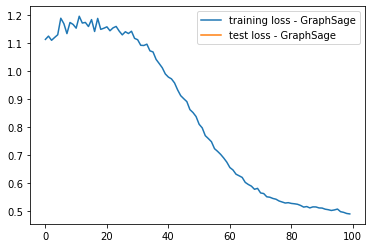

In [1]:
import os
import sys
sys.path.append('..')
sys.path.append('../maps')
from utils import *
from datagen import *
from train import *

%matplotlib inline

for dataagrs in [{'imgpath':'../maps/map1.jpg', 'start':(2064,2114,21,71), 'goal':(21,71,3825,3875),'poolsize':10, 'test_size':0.3} ]:
    dataargs = objectview(dataagrs)

for args in [{'model_type': 'GraphSage', 'dataset': 'maze', 'num_layers': 2, 'heads': 1, 'node_feat_dim':2, 'num_clusters':10, 'batch_size': 32, 
              'hidden_dim': 32, 'dropout': 0.5, 'epochs': 100, 'lossft': kmeansloss,'opt': 'adam', 'opt_scheduler': 'none', 'opt_restart': 0, 
              'weight_decay': 5e-3, 'lr': 0.001, 'visualize': True,'test':True}]:
    args = objectview(args)        

print("Create the maze dataset")    
dataset = create_dataset(dataargs)

test_loss, losses, best_model, best_loss, test_loader = train(dataset, args) 
print("Minimum loss: {0}".format(min(losses)))

# Run test for our best model to save the predictions!
if args.test:
    test(test_loader, best_model, is_validation=False, save_model_preds=False)
    print()

plt.plot(losses, label="training loss" + " - " + args.model_type)
if args.test:
    plt.plot(test_loss, label="test loss" + " - " + args.model_type)
plt.legend()
plt.show()